In [1]:
import tensorflow as tf
import pandas as pd
import seaborn as sns

In [2]:
data  = pd.read_csv('iris.data',names = ['slength','swidth','plength','pwidth','fclass'])
data

,slength,swidth,plength,pwidth,fclass
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [3]:
data.describe()

,slength,swidth,plength,pwidth
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [4]:
data.isnull().sum()

slength    0
swidth     0
plength    0
pwidth     0
fclass     0
dtype: int64

<Axes: ylabel='pwidth'>

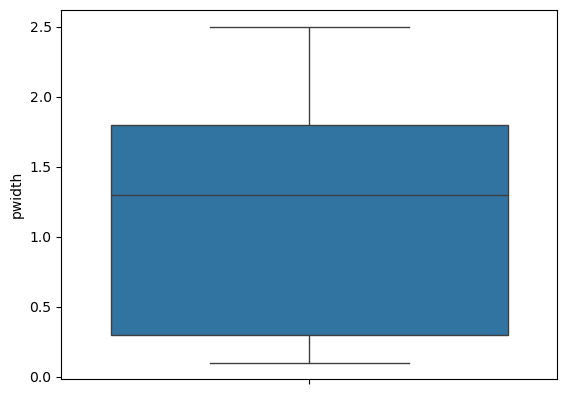

In [5]:
sns.boxplot(data['pwidth'])

No Outliers

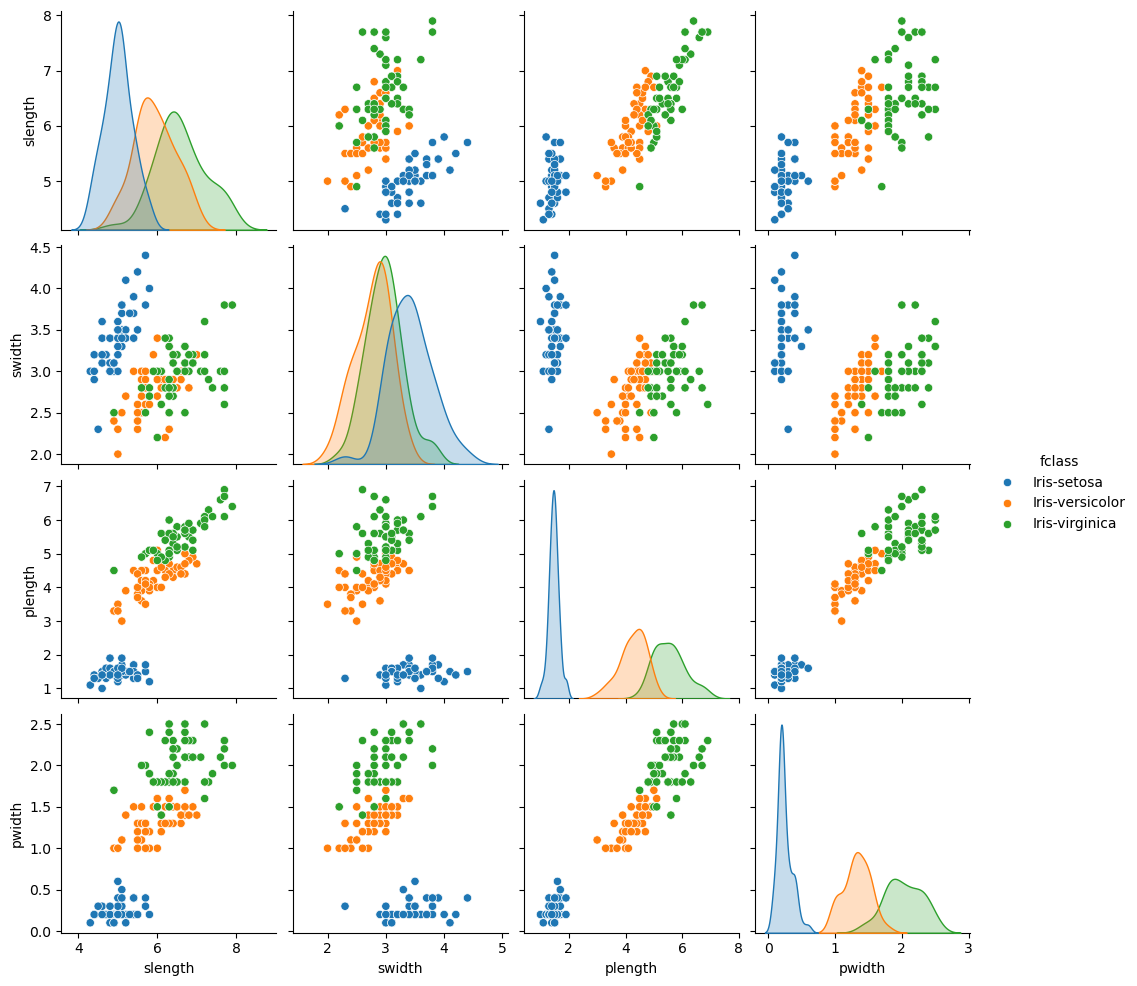

In [6]:
sns.pairplot(data,hue='fclass')

In [7]:
df = data.values
X = df[:,0:4]
y = df[:,4]

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [9]:
X_train.shape[0]

120

In [10]:
X_test.shape[0]

30

In [11]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [12]:
y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of the model is ', accuracy*100)

Accuracy of the model is  100.0


In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       1.00      1.00      1.00        12
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



In [13]:
from sklearn.svm import SVC
svn = SVC()
svn.fit(X_train, y_train)

SVC()

In [21]:
predictions = svn.predict(X_test)
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, predictions)
print('Accuracy of the model is ', score*100)

Accuracy of the model is  96.66666666666667


In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))


                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.92      1.00      0.96        12
 Iris-virginica       1.00      0.91      0.95        11

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



In [16]:
from sklearn.metrics import accuracy_score,confusion_matrix
confusion_matrix(y_test,y_pred)

array([[ 7,  0,  0],
       [ 0, 12,  0],
       [ 0,  0, 11]])